In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import utils as u

BoW_rgb = u.show_and_get_colored_img('.././photos_test/square/with_pieces/black_on_white_g.png')
BoW_g = u.show_and_get_gray_img('.././photos_test/square/with_pieces/black_on_white_g.png')

Black_square = u.show_and_get_colored_img('.././photos_test/square/without_pieces/black_c.png')
B_g = u.show_and_get_gray_img('.././photos_test/square/without_pieces/black_c.png')


AttributeError: module 'utils' has no attribute 'show_and_get_colored_img'

In [3]:
def get_gradient(img):
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=1)

    mag = np.sqrt(gx**2 + gy**2)
    mean_gradient = np.mean(mag)

    print("Le gradient moyen de l'image est : ", round(mean_gradient, 1))
    return mean_gradient

get_gradient(BoW_g)
get_gradient(B_g)

Le gradient moyen de l'image est :  24.3
Le gradient moyen de l'image est :  2.9


2.898876404494382

In [4]:
def is_piece_in_square(img, treshold=10):
    return get_gradient(img) > treshold

In [5]:
def show_img_and_piece_presence(img):
    piece_presence = is_piece_in_square(img)
    if piece_presence:
        title = 'There is a piece in this square :'
    else :
        title = "There isn't any piece in this square :"
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()
    return piece_presence

Le gradient moyen de l'image est :  2.9


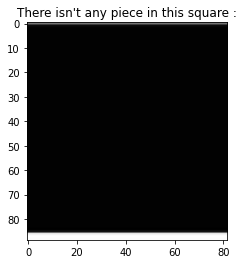

Le gradient moyen de l'image est :  24.3


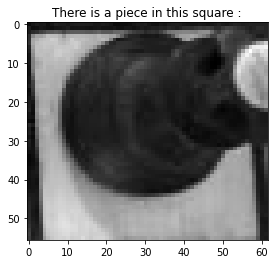

True

In [6]:
show_img_and_piece_presence(B_g)
show_img_and_piece_presence(BoW_g)

In [12]:
empty_squares_path = '.././photos_test/square/without_pieces/'
pieces_path = '.././photos_test/square/with_pieces/'

def get_list_img_path(folder_path):
    elements = sorted(os.listdir(folder_path))
    imgs_path = [folder_path + img_name for img_name in elements]
    return imgs_path

utils.get_list_img_path(empty_squares_path)

['.././photos_test/square/without_pieces/black_c.png',
 '.././photos_test/square/without_pieces/black_g.png',
 '.././photos_test/square/without_pieces/white_m.png']

Le gradient moyen de l'image est :  2.9


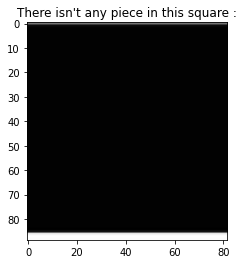

Le gradient moyen de l'image est :  6.6


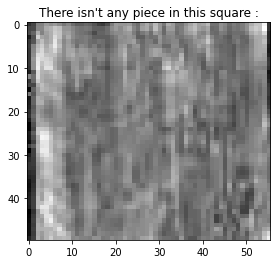

Le gradient moyen de l'image est :  7.2


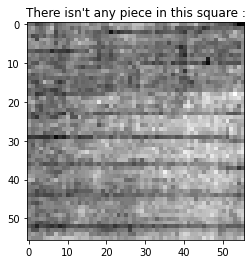

0 pieces detected on 3 images


In [8]:
def get_result_for_folder(folder_path):
    img_paths = get_list_img_path(folder_path)
    nb_img = len(img_paths)
    pieces_detected = 0
    for img_path in img_paths:
        img = cv2.imread(img_path,0)
        pieces_detected += show_img_and_piece_presence(img)
    print(pieces_detected, 'pieces detected on', nb_img, 'images' )

get_result_for_folder(empty_squares_path)